In [2]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from src.loading import *

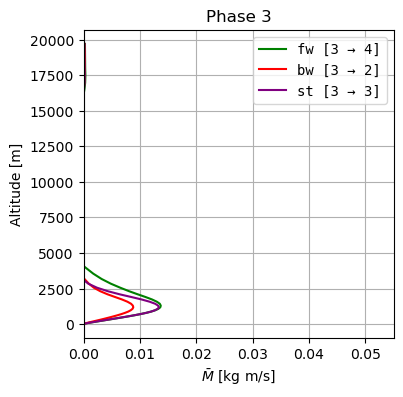

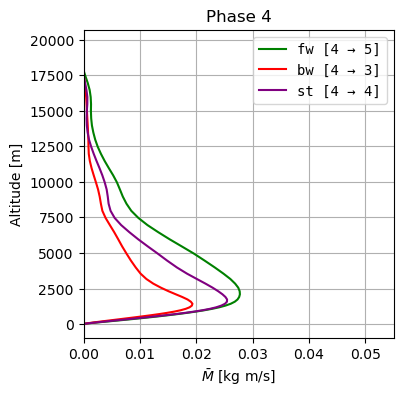

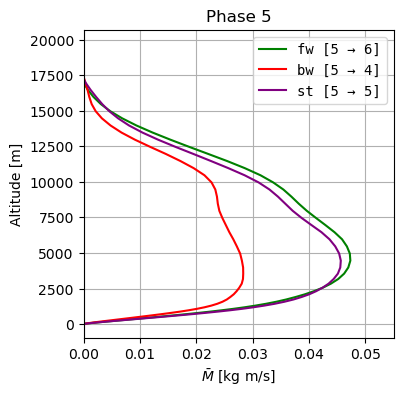

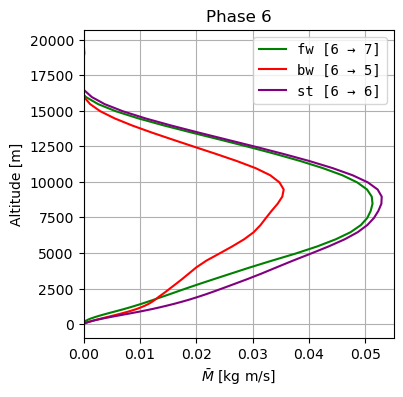

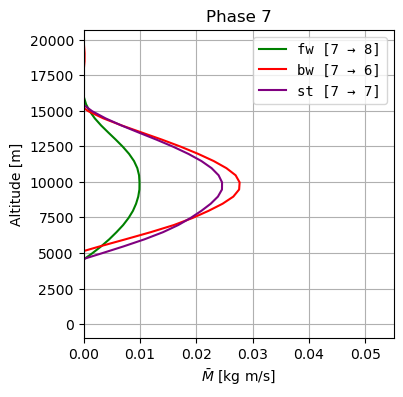

In [20]:
# Plot mean vertical motions
#
for phase in [3, 4, 5, 6, 7]:
    fig, ax = plt.subplots(figsize=(4,4))
    for trans_type, color, delta in zip(['fw', 'bw', 'st'], ['green', 'red', 'purple'], [1, -1, 0]):
        w = load_phase_transition_composite_mean('wa', phase, trans_type)
        mass_flux = w * load_gsam_reference_profiles().rho
        mass_flux.plot(ax=ax, y='z', label=f'{trans_type} [{phase} → {phase+delta}]', color=color)
    ax.set_xlim(0, 0.055)
    ax.set_ylabel('Altitude [m]')
    ax.set_xlabel(r'$\bar{M}$ [kg m/s]')
    ax.legend(prop={'family': 'monospace'})
    ax.grid()
    ax.set_title(f'Phase {phase}')

In [ ]:
# Plot mean circulation and cloud fractions
#

        

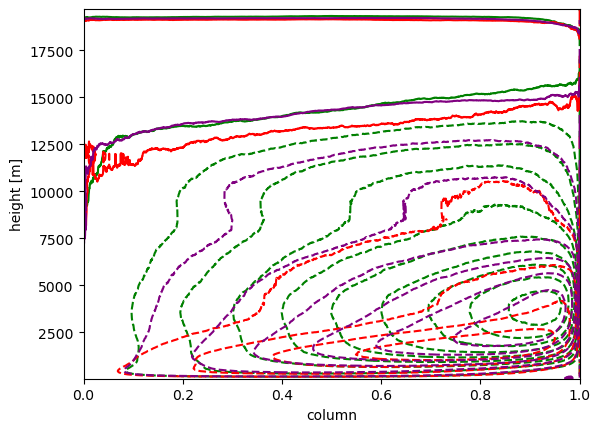

In [19]:
variable = 'wa'
for phase in [4, 5, 6]:
    fig, ax = plt.subplots()
    for colori, trans_type in enumerate(['fw', 'bw', 'st']):
        color = ['green', 'red', 'purple'][colori]
        w = load_phase_transition_composite_anomaly('wa', phase, trans_type)
        circ = w.cumsum('column')
        circ.plot.contour(ax=ax, y='z', levels=np.linspace(-150, 0, 20), colors=color)
        
    break
